In [ ]:
# tensorflow 변수의 종류 : constant, variables(가중치), placholder(주입변수)
- GPU메모리 영역은 용도가 다름
- GPU 메모리는 올양이 작업
- GPU 부동소수점 연산기 1024
- 데이터 : fully-connected(일렬로 서서) 일렬로 서는 이유 : 내적 연산을 하기 떄문
- 가중치학습,cost function(비용함수)은 결과에 대한 판단
   결과 : 연속형, identity -> MSE(평균제곱오차)
          범주형, softmax -> coross entrypo
   activation function(활성화함수)
       - sigmoid -> 사용했지만 기울기 소실 문제가 발생함 -> tanh(-1~1) -> -> Relu(0보다 큰놈만 취급)
       -> 좀 더 부드럽게 만듬ㅁ - > softplus
       LeakyRelu(-1까지 고려) -> elu (지수용으로 부드럽게 곡선을 탐)

In [5]:
# tf 1.5 keras tf.2.3의 차이 
    #- 정적으로 그래프를 생성
    #- 처음 그래프를 정의하고 
    #- run에서 실행
# constant , variables, placeholder
    #-cuda : 과학계산에 행렬연산을 GPU에서 하자 -> 값을 반환 
    #-network 요소 > Session
# keras 는 모델만 구현해서 작동 
# tf.23 은 eager mode 에서 함수 및 class base 로 작동

import tensorflow as tf 
def showvalue(t):
    sess = tf.InteractiveSession() # 대화형 세션
    tf.global_variables_initializer().run() # 변수가 있으면 반드시 초기화
    print(t.eval())
    sess.close()

In [6]:
c2, c3 = tf.constant([1.2,5.6]), tf.constant([-4,-1,7])
v2, v3 = tf.Variable([2.3,4.5]), tf.Variable([-2,3,5])
showvalue(tf.add_n([c2,v2])) # n : 여러개 벡터 행렬연산에서 일반 +-*/ 요소별 연산
showvalue(tf.add_n([c3,v3,v3])) 
showvalue(tf.sqrt(tf.cast(v3,tf.float64)))  #math함수들이 동작

[ 3.5 10.1]
[-8  5 17]
[       nan 1.73205081 2.23606798]


In [7]:
# tensorflow 는 numpy 와 호환 

In [11]:
def run_variable(variable):
    tf.global_variables_initializer()
    with tf.Session() as sess:
        return sess.run(variable)
    

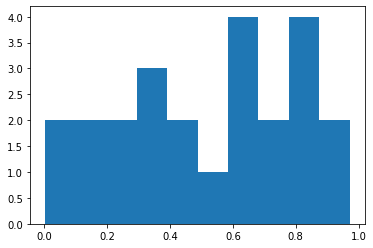

In [12]:
%matplotlib inline 
my_distribution = tf.random_uniform((6,4), seed= 42)
uniform = run_variable(my_distribution)
from matplotlib import pyplot as plt 
plt.hist(uniform.flatten())
plt.show()

In [23]:
a = tf.constant([1,2,3,4,5,6],shape=[2,3])
b= tf.constant([7,8,9,10,11,12],shape=[3,2])
sess = tf.Session() # 세션작업
result = tf.matmul(a,b)
print(result) # graph 는 node 와 node(계산식) 으로 구성이 되고 연결하는 것은 Tensor
sess.run(result) # 호출할때 연산 실행 (앞단의 노드가 모두 실행이 되어야 실행)
# 분산처리가 가능하게 하기 위해서

Tensor("MatMul_2:0", shape=(2, 2), dtype=int32)


array([[ 58,  64],
       [139, 154]])

In [24]:
diagonal = [1,2,3,4]
dia = tf.diag(diagonal) # 대각행렬 > 내부적으로 graph 를 생성 
print(sess.run(dia))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [25]:
print(sess.run(tf.diag_part(dia)))

[1 2 3 4]


In [26]:
print(sess.run(tf.trace(dia)))

10


In [27]:
x = tf.transpose(dia)
print(sess.run(x))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [29]:
# 선형대수나 math 사용하는 구조가 numpy 와 동일하다.
x = tf.transpose(dia)
print(sess.run(x))

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [30]:
t = [1,2,3,4,5,6,7,8,9]
print(sess.run(tf.reshape(t,[3,3])))

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [39]:
x = tf.Variable(0,name='x') # 그래프 출력시 node 를 확인, 모델을 저장하고 로딩시 구분
hap = tf.Variable(0, name='hap')
model = tf.global_variables_initializer()
with tf.Session() as session:
    for i in range(10):
        session.run(model)
        x= x+1
        hap = hap + x
        print(session.run(x))
    print("1부터 10까지의 합=", session.run(hap))

1
2
3
4
5
6
7
8
9
10
1부터 10까지의 합= 55


In [46]:
import tensorflow as tf 
import numpy as np 
# 대량의 데이터
# 계산 그래프를 구성( 계싼식은 node , edge : tensor)
a = tf.placeholder(tf.int32, shape=[2], name = "my_input") # 외부주입변수
b = tf.reduce_prod(a, name='prod_b')
c = tf.reduce_sum(a,name="sum_c")
d = tf.add(b,c,name="add_d")
sess = tf.Session()
input_dict = {a:np.array([5,3],dtype=np.int32)}
sess.run(d, feed_dict = input_dict)



23

In [64]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True) # y 값을 one hot encoding
learning_rate = 0.01 # 학습율
training_epochs = 25 # 반복학습 회수
batch_size = 100 # mini batch 사이즈  50000장 이미지 > 500덩어리 학습 * 25
display_epoch = 1 
logs_path = '/tmp/tensorflow_logs/example/' # tensorboard
# 외부 주입변수 : GPU 메모리
x = tf.placeholder(tf.float32 , [None,784] , name='InputData')
y = tf.placeholder(tf.float32 , [None,10],name = 'LabelData')

# 100 X 784 

# 역전파가 벌어질때 수정되어야 할 것 
W = tf.Variable(tf.zeros([784,10]), name = 'Weights') # 나가는(출력) 값 10 
b = tf.Variable(tf.zeros([10]), name='Bias')
# 마지막 activation  연속형 : mse ,  활성화 함수  > softmax 

# 학습
pred = tf.nn.softmax(tf.matmul(x,W) + b ) # 행렬곱 # 100X10 # 0.1 0.06 0.3 0.5 0.01 0 0 0 0 0 
    # 확률로 표현 > SOFTMAX 결과값을 확률값으로 표현

#cross-entropy 실제값 * tf.log(pred) : 분류할때 사용 
# 평균 비용함수
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # 최적화기를 지정 : 경사하강법 optimizer
# 숫자 : 0,1,2,3,4,5,6,7,8,9
# 실제값 : 0,0,0,0,0,0,1,0,0,0
# 인덱스 : 0,1,2,3,4,5,6,7,8,9
# 예측값 0.01,0.01,0.8 모두더하면 1


acc = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
acc = tf.reduce_mean(tf.cast(acc,tf.float32))
init = tf.global_variables_initializer()
tf.summary.scalar("loss", cost) # tensorboard 에 정보 저장하기 전에 정보를 모음 
tf.summary.scalar("accuracy", acc) 
merged_summary_op = tf.summary.merge_all()


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [67]:
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter(logs_path, graph = tf.get_default_graph())
    for epoch in range(training_epochs): # 동일한 데이터
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            # 데이터를 100개씩 자동으로 피딩
            batch_xs , batch_ys = mnist.train.next_batch(batch_size)
            _, c, summary = sess.run([optimizer, cost, merged_summary_op], feed_dict={x:batch_xs, y: batch_ys})
            summary_writer.add_summary(summary, epoch * total_batch + i)
            avg_cost += c / total_batch
            
        if (epoch+1) % display_epoch == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
            
    print("최적화 종료")
    # eval : 수식으로 평가 : 테스트 데이터로 평가
    print("accuracy :", acc.eval({x:mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 1.183574758
Epoch: 0002 cost= 0.665345074
Epoch: 0003 cost= 0.552781630
Epoch: 0004 cost= 0.498740603
Epoch: 0005 cost= 0.465501846
Epoch: 0006 cost= 0.442600368
Epoch: 0007 cost= 0.425515202
Epoch: 0008 cost= 0.412205074
Epoch: 0009 cost= 0.401431416
Epoch: 0010 cost= 0.392380055
Epoch: 0011 cost= 0.384785831
Epoch: 0012 cost= 0.378191270
Epoch: 0013 cost= 0.372430160
Epoch: 0014 cost= 0.367326582
Epoch: 0015 cost= 0.362759534
Epoch: 0016 cost= 0.358564790
Epoch: 0017 cost= 0.354889061
Epoch: 0018 cost= 0.351511177
Epoch: 0019 cost= 0.348324901
Epoch: 0020 cost= 0.345407669
Epoch: 0021 cost= 0.342718333
Epoch: 0022 cost= 0.340230018
Epoch: 0023 cost= 0.337958349
Epoch: 0024 cost= 0.335748886
Epoch: 0025 cost= 0.333704328
최적화 종료
accuracy : 0.9133
